# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Dwi Saputra]
- **Email:** [Dwisaputra204@gmail.com]
- **ID Dicoding:** [dwi_saputra97]


## Menentukan Pertanyaan Bisnis

1. Bagaimana trend pengguna sepeda **casual** & **register** pada tahun 2011 sampai 2012 ?
2. Apa dampak **weathersit** pada jumlah pengguna sepeda ?
3. Pada jam / **hour** berapa pengguna layanan sepeda meningkat atau paling banyak digunakan ?
4. Musim **season** apa yang paling banyak pengguna sepeda ?
5. Berapa perbandingan pengguna **casual** & **register** ?


Note : Text bold mewakili kolom pada dataset

## Import Semua Packages/Library yang Digunakan

In [3]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
# Memuat data day (sesuaikan path / lokasi file) dan menampilkan 5 data teratas
df_day = pd.read_csv("/content/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# Memuat data hour (sesuaikan path / lokasi file) dan menampilkan 5 data teratas
df_hour = pd.read_csv("/content/hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data day dan hour berisi kolom yang sama dan hanya dibedakan pada kolom hr (**hour**) yang berisi informasi jam penggunaan / peminjaman sepeda
- Data Hour memuat data lebih detail
- Berdasarkan pertanyaan bisnis terdapat analisa mengenai peningkatan pada jam tertentu, sehingga kita hanya perlu menggunakan data **hour** saja pada proyek ini
- Penjelasan setiap kolom (dataset) :
  1. instant: Nomor setiap baris data.
  2. dteday: Tanggal penggunaan sepeda.
  3. season: Musim (1: Musim semi, 2: Musim panas, 3: Musim gugur, 4: Musim dingin).
  4. yr: Tahun (0: 2011, 1: 2012).
  5. mnth: Bulan (1 - 12).
  6. hr : hour (0 - 23)
  7. holiday: Hari libur (1: libur, 0: bukan libur).
  8. weekday: Hari dalam minggu (0: Minggu, ... 6: Sabtu).
  9. workingday: Hari kerja (1: hari kerja, 0: bukan hari kerja).
  10. weathersit: Kategori cuaca (1: Cerah, 2: Berawan, 3: Hujan ringan, 4: Hujan lebat).
  11. temp: Suhu normalisasi dalam skala (0-1).
  12. atemp: Suhu terasa dalam skala (0-1).
  13. hum: Kelembapan dalam skala (0-1).
  14. windspeed: Kecepatan angin dalam skala 0-1.
  15. casual: Jumlah pengguna sepeda yang tidak terdaftar (informal).
  16. registered: Jumlah pengguna sepeda yang terdaftar.
  17. cnt: Total jumlah sepeda yang disewa (gabungan dari pengguna casual dan registered).

### Assessing Data

In [6]:
# Check missing value pada data df_hour
df_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
# Check data duplicate
print("Jumlah duplicate data hour :", df_hour.duplicated().sum())

Jumlah duplicate data hour : 0


In [8]:
# Check statistik numeric pada df_hour
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
# Check tipe data pada df_hour
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Tidak ada data missing value
- Tidak ada data duplicate

### Cleaning Data

In [10]:
# Hapus kolom yang tidak diperlukan sesuai dengan pertanyaan bisnis
# kolom instant, temp, atemp, hum, windspeed
df_hour.drop(['instant','temp','atemp','hum','windspeed'], axis = 1, inplace= True)

In [11]:
# Menyesuaikan nama kolom agar mudah di mengerti
df_hour.rename(columns={'dteday':'date','hr':'hour','yr':'year','mnth':'month','cnt' : 'total'},inplace=True)

In [12]:
# Menyesuaikan tipe data date dari object ke datetime
df_hour['date'] = pd.to_datetime(df_hour['date'])

In [13]:
# Menyesuaikan nilai season dari numeric ke teks (1:spring, 2:summer, 3:fall, 4:winter)
df_hour.season.replace((1,2,3,4),('Spring','Summer','Fall','Winter'),inplace=True)

# Menyesuaikan nilai year dari numeric ke teks (0:2011, 1:2012)
df_hour.year.replace((0,1),('2011','2012'),inplace=True)

# Menyesuaikan nilai month dari numeric ke teks (1:Jan, 2:Feb, 3: Mar, .... 12: Des)
df_hour.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Menyesuaikan nilai year dari numeric ke teks (0: No, 1: Yes)
df_hour.holiday.replace((0,1),('No','Yes'),inplace=True)

# Menyesuaikan nilai weekday dari numeric ke teks (0: Sunday, 1: Monday, ... 6 : Saturday)
df_hour.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Menyesuaikan nilai workingday dari numeric ke teks (0: No, 1: Yes)
df_hour.workingday.replace((0,1),('No','Yes'),inplace=True)

# Menyesuaikan nilai weathersit dari numeric ke teks (1: Clear, 2: Mist, 3: Light Snow, 4: Heavy Rain)
df_hour.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

In [14]:
df_hour.head()

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,casual,registered,total
0,2011-01-01,Spring,2011,Jan,0,No,Saturday,No,Clear,3,13,16
1,2011-01-01,Spring,2011,Jan,1,No,Saturday,No,Clear,8,32,40
2,2011-01-01,Spring,2011,Jan,2,No,Saturday,No,Clear,5,27,32
3,2011-01-01,Spring,2011,Jan,3,No,Saturday,No,Clear,3,10,13
4,2011-01-01,Spring,2011,Jan,4,No,Saturday,No,Clear,0,1,1


In [15]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        17379 non-null  datetime64[ns]
 1   season      17379 non-null  object        
 2   year        17379 non-null  object        
 3   month       17379 non-null  object        
 4   hour        17379 non-null  int64         
 5   holiday     17379 non-null  object        
 6   weekday     17379 non-null  object        
 7   workingday  17379 non-null  object        
 8   weathersit  17379 non-null  object        
 9   casual      17379 non-null  int64         
 10  registered  17379 non-null  int64         
 11  total       17379 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 1.6+ MB


**Insight:**
- Nama kolom disesuaikan kembali agar mudah di pahami
- Nilai kolom numeric yang mewakili nilai tertentu di ganti dengan nilai sebenarnya
- Tipe data kolom date di sesuaikan dari object ke datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [16]:
# Tampilkan rangkuman parameter statistik
df_hour.describe(include="all")

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,casual,registered,total
count,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,NaN,2,7,2,4,NaN,NaN,NaN
top,NaN,Fall,2012,May,NaN,No,Saturday,Yes,Clear,NaN,NaN,NaN
freq,NaN,4496,8734,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,367.000000,886.000000,977.000000


Rangkuman parameter statistik, jumlah pelanggan adalah 17379. Berdasarkan data yang ditampilkan pada pengguna casual dan registered terdapat perbedaan yang signifikan, dimana jumlah maximal pengguna register hingga 886 sedangkan casual hanya sampai 367 saja. Dari parameter statistik juga ditemukan bahwa total penggunaan tertinggi hingga 977 dan terendah hanya 1 dalam hitungan harian dan jam rata untuk penggunaan sepeda adalah 11.54 dengan standar deviasi 6.91

In [17]:
# Pivot data season
df_hour.groupby(by='season').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'total' : 'sum'
}).sort_values(by='total',ascending=True)

,casual,registered,total
season,,,
Spring,60622,410726,471348
Winter,129782,711831,841613
Summer,203522,715067,918589
Fall,226091,835038,1061129


In [18]:
# Pivot data year
df_hour.groupby(by='year').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'total' : 'sum'
}).sort_values(by='total',ascending=True)

,casual,registered,total
year,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


In [19]:
# Melakukan groupby dan agregasi pada bulan
df_pivot = df_hour.groupby(by='month').agg({
    'casual': ['sum', 'mean'],
    'registered': ['sum', 'mean'],
    'total': 'sum'
})

# Mengurutkan berdasarkan kolom 'total' sum
df_sorted = df_pivot.sort_values(by=('total', 'sum'), ascending=False)

# Menampilkan hasil
print(df_sorted)


      casual            registered               total
         sum       mean        sum        mean     sum
month                                                 
Aug    72039  48.840000     279155  189.257627  351194
Jun    73906  51.323611     272436  189.191667  346342
Sep    70323  48.937370     275668  191.835769  345991
Jul    78157  52.524866     266791  179.295027  344948
May    75285  50.594758     256401  172.312500  331686
Oct    59760  41.185389     262592  180.973122  322352
Apr    60802  42.311761     208292  144.949200  269094
Nov    36603  25.471816     218228  151.863605  254831
Mar    44444  30.172437     184476  125.238289  228920
Dec    21693  14.627782     189343  127.675657  211036
Feb    14963  11.158091     136389  101.706935  151352
Jan    12042   8.426872     122891   85.997901  134933


In [20]:
# Pivot data hour
df_hour.groupby(by='hour').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'total' : 'sum'
}).sort_values(by='total',ascending=True)

,casual,registered,total
hour,,,
4,874,3554,4428
3,1893,6281,8174
5,1012,13249,14261
2,3412,12940,16352
1,4709,19455,24164
0,7375,31755,39130
6,3017,52115,55132
23,11065,52876,63941
22,16200,79412,95612


In [21]:
# Pivot data holiday
df_hour.groupby(by='holiday').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'total' : 'sum'
})

,casual,registered,total
holiday,,,
No,597658,2616586,3214244
Yes,22359,56076,78435


In [22]:
# Pivot data weekday
df_hour.groupby(by='weekday').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'total' : 'sum'
}).sort_values(by='total',ascending=True)

,casual,registered,total
weekday,,,
Sunday,140521,303506,444027
Monday,70784,384719,455503
Tuesday,57843,411266,469109
Wednesday,57319,415729,473048
Saturday,153852,323955,477807
Thursday,61460,423935,485395
Friday,78238,409552,487790


In [23]:
# Pivot data workingday
df_hour.groupby(by='workingday').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'total' : 'sum'
}).sort_values(by='total',ascending=True)

,casual,registered,total
workingday,,,
No,316732,683537,1000269
Yes,303285,1989125,2292410


In [24]:
df_hour.groupby(by='weathersit').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'total' : 'sum'
}).sort_values(by='total',ascending=True)

,casual,registered,total
weathersit,,,
Heavy_rainsnow,8,215,223
Light_rainsnow,22783,135548,158331
Misty,134481,661471,795952
Clear,462745,1875428,2338173


**Insight:**
- Season Fall adalah season yang paling tinggi dengan total 1.061.129 secara penggunaan sepeda dan Season Winter adalah yang paling terendah dengan total 471.348.

- Tahun 2012 lebih tinggi daripada 2011 dimana 2012 secara penggunaan sepeda terdapat 2.049.576 pengguna sedangkan 2011 hanya 1.243.103.

- Bulan Agustus merupakan bulan dengan penggunaan tertinggi dengan total 351.194 dan bulan Januari adalah yang terendah dengan 134.933. Tetapi jika diperhatikan berdasarkan tipe casual, total pengguna paling banyak untuk casual ada di bulan July.

- Jam 17 merupakan jam dengan penggunaan sepeda paling tinggi sebanyak 336.860 sedangkan jam 4 yang terendah sebanyak 4.428.

- Pengguna sepeda cenderung lebih sedikit saat holiday sebanyak 78.435 ketimbang saat tidak holiday yaitu 3.214.244

- Hari jumat adalah puncak penggunaan paling tinggi yaitu 487.790 sedangkan hari minggu terendah dengan 444.027

- Saat workingday sepeda banyak digunakan sebanyak 2.292.410 daripada tidak yaitu 1.000.269. Hal ini sejalan dengan pivot pada data holiday

- pengguna sepeda saat cuaca dengan status clear lebih banyak yaitu 2.338.173, berbanding terbalik saat cuaca heavy rainsnow dengan total 223 saja.



## Visualization & Explanatory Analysis

1. Bagaimana trend pengguna sepeda casual & register pada tahun 2011 sampai 2012 ?
2. Apa dampak weathersit pada jumlah pengguna sepeda ?
3. Pada jam / hour berapa pengguna layanan sepeda meningkat atau paling banyak digunakan ?
4. Musim season apa yang paling banyak pengguna sepeda ?
5. Berapa perbandingan pengguna casual & register ?

### Pertanyaan 1: Bagaimana trend pengguna sepeda casual & register pada tahun 2011 sampai 2012 ?

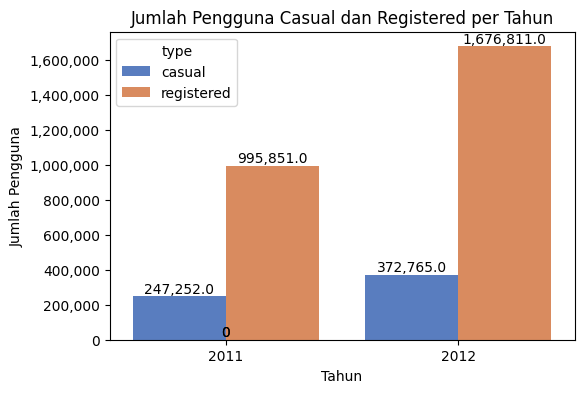

In [25]:
# Group by berdasarkan tahun kemudian tampung kedalam variable
df_grouped = df_hour.groupby(by='year').agg({
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

# Sesuaikan data menjadi long format (untuk seaborn)
df_melt = df_grouped.melt(id_vars='year', value_vars=['casual', 'registered'],
                          var_name='type', value_name='sum')

# Membuat figure
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='year', y='sum', hue='type', data=df_melt, palette='muted')

# Format angka pada sumbu y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Tambahkan label dan judul
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pengguna')
plt.title('Jumlah Pengguna Casual dan Registered per Tahun')

# Tambahkan jumlah di atas bar
for p in ax.patches:
    # Ambil tinggi bar
    height = p.get_height()
    # Tambahkan teks di atas bar
    ax.annotate(format(height, ','),
                (p.get_x() + p.get_width() / 2., height),
                ha = 'center', va = 'center',
                xytext = (0, 5),  # offset teks di atas bar
                textcoords = 'offset points')

# Tampilkan grafik
plt.show()


Berdasarkan grafik trend perbandingan dari tahun 2011 sampai 2012, terdapat perbedaan jumlah pengguna yang sangat jauh. Antara casual dan registered sama-sama mengalami meningkatkan dari tahun 2011 ke 2012.

### Pertanyaan 2: Apa dampak weathersit pada jumlah pengguna sepeda ?

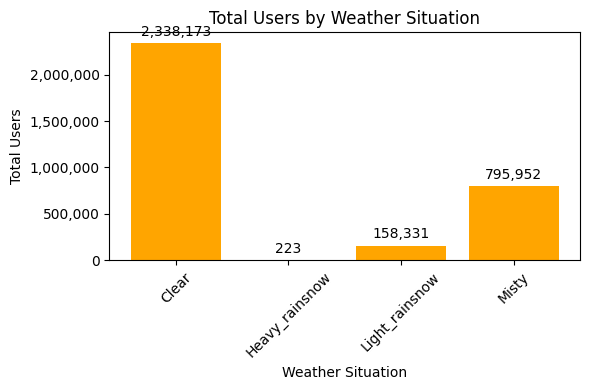

In [26]:
# Group by berdasakran wethersit
df_grouped = df_hour.groupby(by='weathersit').agg({
    'total': 'sum'
}).reset_index()

# Ambil data dari hasil groupby
weathersit = df_grouped['weathersit']
total = df_grouped['total']

# Buat figure dan axis
plt.figure(figsize=(6, 4))

# Plot bar
plt.bar(weathersit, total, color='orange')

# Format angka pada sumbu y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Tambahkan label dan judul
plt.xlabel('Weather Situation')
plt.ylabel('Total Users')
plt.title('Total Users by Weather Situation')

# Tambahkan jumlah di atas bar
for i, value in enumerate(total):
    plt.text(i, value + 50000, format(value, ','), ha='center', va='bottom')

# Tampilkan grafik
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


- Berdasarkan grafik trend perbandingan weathersit / weather situation terlihat jelas weathe dengan nilai clear paling tinggi dengan total : 2.338.173
- Sedangkan Heavy_rainsnow terendah dengan total 223

### Pertanyaan 3: Pada jam / hour berapa pengguna layanan sepeda meningkat atau paling banyak digunakan ?

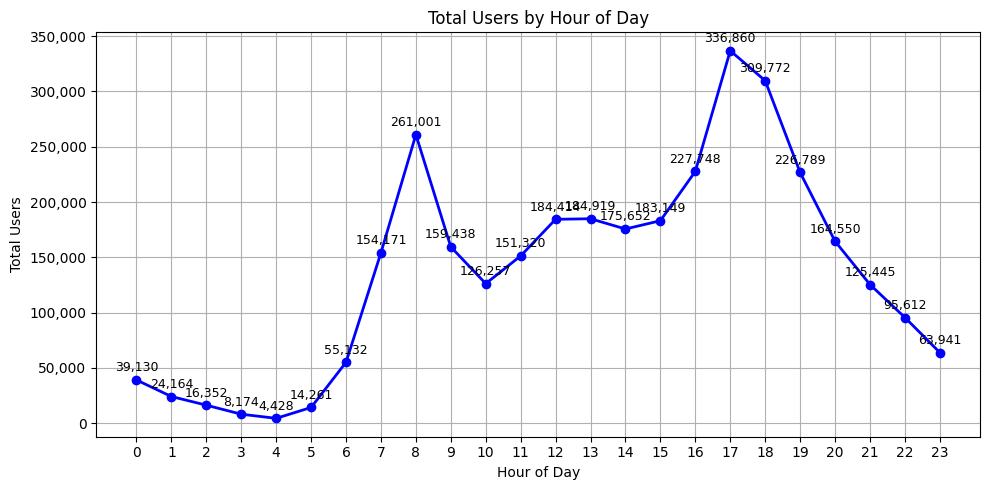

In [27]:
# Group by berdasarkan hour
df_grouped = df_hour.groupby(by='hour').agg({
    'total': 'sum'
}).reset_index()

# Ambil data dari hasil groupby
hours = df_grouped['hour']
total = df_grouped['total']

# Buat figure dan axis
plt.figure(figsize=(10, 5))

# Plot line chart
plt.plot(hours, total, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

# Format angka pada sumbu y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Tambahkan label dan judul
plt.xlabel('Hour of Day')
plt.ylabel('Total Users')
plt.title('Total Users by Hour of Day')

# Tambahkan grid untuk membantu pembacaan
plt.grid(True)

# Tambahkan total di setiap titik
for i, value in enumerate(total):
    plt.text(hours[i], value + 5000, format(value, ','), ha='center', va='bottom', fontsize=9)

# Tampilkan grafik
plt.xticks(range(0, 24))  # Set x-axis ticks to show every hour
plt.tight_layout()
plt.show()


- Berdasarkan grafik trend perbandingan setiap jam terlihat jelas jam paling tinggi pengguna sepeda adalah jam 17 dengan total : 336860
- Sedangkan jam 4 adalah yang terendah dengan total : 4428

### Pertanyaan 4: Musim season apa yang paling banyak pengguna sepeda ?

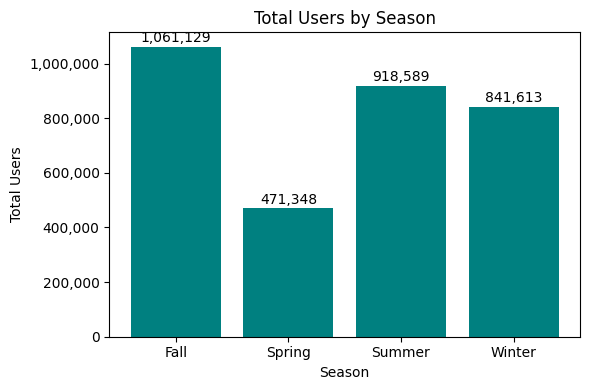

In [28]:

# Data hasil groupby
df_grouped_season = df_hour.groupby(by='season').agg({
    'total': 'sum'
}).reset_index()

# Ambil data dari hasil groupby
seasons = df_grouped_season['season']
total = df_grouped_season['total']

# Buat figure dan axis
plt.figure(figsize=(6, 4))

# Plot bar chart
plt.bar(seasons, total, color='teal')

# Tambahkan label dan judul
plt.xlabel('Season')
plt.ylabel('Total Users')
plt.title('Total Users by Season')

# Format angka pada sumbu y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Tambahkan jumlah di atas bar
for i, value in enumerate(total):
    plt.text(seasons[i], value + 5000, format(value, ','), ha='center', va='bottom', fontsize=10)

# Tampilkan grafik
plt.tight_layout()
plt.show()


- Berdasarkan season fall adalah puncak tertinggi penggunaan sepeda hingga 1.061.129
- Sedangkan spring cenderung paling rendah dengan total pengguna 471.348

### Pertanyaan 5: Berapa perbandingan pengguna casual & register ?

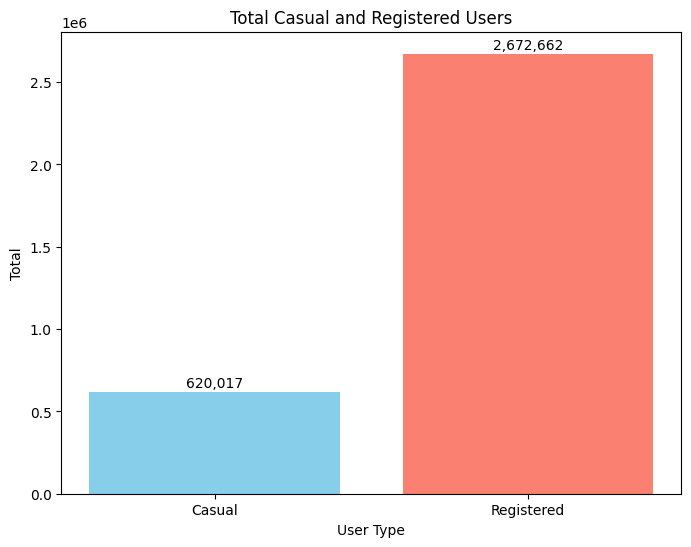

In [29]:
# Hitung total keseluruhan dari 'casual' dan 'registered'
total_casual = df_hour['casual'].sum()
total_registered = df_hour['registered'].sum()

# Data untuk bar chart
categories = ['Casual', 'Registered']
totals = [total_casual, total_registered]

# Buat bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, totals, color=['skyblue', 'salmon'])

# Tambahkan label dan judul
plt.xlabel('User Type')
plt.ylabel('Total')
plt.title('Total Casual and Registered Users')

# Tambahkan nilai di atas bar
for i, value in enumerate(totals):
    plt.text(i, value + 10000, f'{value:,}', ha='center', va='bottom')

# Tampilkan grafik
plt.show()


- Pengguna Registered lebih banyak daripada casual
- Total pengguna registered 2.672.662 sedangkan casual hanya 620.017

## Conclusion

1. Bagaimana trend pengguna sepeda casual & register pada tahun 2011 sampai 2012 ?
2. Apa dampak weathersit pada jumlah pengguna sepeda ?
3. Pada jam / hour berapa pengguna layanan sepeda meningkat atau paling banyak digunakan ?
4. Musim season apa yang paling banyak pengguna sepeda ?
5. Berapa perbandingan pengguna casual & register ?

- Conclusion 1 : Berdasarkan grafik trend perbandingan dari tahun 2011 sampai 2012, terdapat perbedaan jumlah pengguna yang sangat jauh. Antara casual dan registered sama-sama mengalami peningkatkan dari tahun 2011 ke 2012.

- Conclusion 2 : Berdasarkan grafik trend perbandingan weathersit / weather situation terlihat jelas weather dengan nilai clear paling tinggi dengan total : 2.338.173,
Sedangkan Heavy_rainsnow terendah dengan total 223

- Conclusion 3 : Berdasarkan grafik trend perbandingan setiap jam terlihat jelas jam paling tinggi pengguna sepeda adalah jam 17 dengan total : 336860,
Sedangkan jam 4 adalah yang terendah dengan total : 4428

- Conclusion 4 : Berdasarkan season fall adalah puncak tertinggi penggunaan sepeda hingga 1.061.129,
Sedangkan spring cenderung paling rendah dengan total pengguna 471.348

- Conclusion 5 : Pengguna Registered lebih banyak daripada casual Total pengguna registered 2.672.662 sedangkan casual hanya 620.017

## Analisis Lanjutan : Clustering Penggunaan Harian

In [30]:
# kategorikan data total
percentiles = df_hour['total'].quantile([0.33, 0.66])

# Tentukan kategori
def categorize_total(total):
    if total <= percentiles[0.33]:
        return 'Rendah'
    elif total <= percentiles[0.66]:
        return 'Sedang'
    else:
        return 'Tinggi'

# Terapkan kategorisasi
df_hour['cluster'] = df_hour['total'].apply(categorize_total)

# Tampilkan sampel dari setiap kategori
sampel_rendah = df_hour[df_hour['cluster'] == 'Rendah'].sample(5)
sampel_sedang = df_hour[df_hour['cluster'] == 'Sedang'].sample(5)
sampel_tinggi = df_hour[df_hour['cluster'] == 'Tinggi'].sample(5)

print("Sampel Rendah:")
print(sampel_rendah[['total', 'cluster']])

print("\nSampel Sedang:")
print(sampel_sedang[['total', 'cluster']])

print("\nSampel Tinggi:")
print(sampel_tinggi[['total', 'cluster']])


Sampel Rendah:
      total cluster
9510     17  Rendah
781      39  Rendah
351      15  Rendah
6182      6  Rendah
486      27  Rendah

Sampel Sedang:
       total cluster
10043    183  Sedang
2749     157  Sedang
7174     152  Sedang
15968     89  Sedang
15888    124  Sedang

Sampel Tinggi:
       total cluster
16146    606  Tinggi
13802    421  Tinggi
11260    301  Tinggi
6436     511  Tinggi
11505    653  Tinggi


Cluster menunjukan kategori penggunaan perjam